In this notebook various trained models are analyzed and compared against each other as well as against plain Neural ODE and Symbolic Regression baselines.

In [1]:
using OrdinaryDiffEq, Plots

push!(LOAD_PATH, "../src")

using Pendulum, NeuralODE, SymReg

m1 = 1 #units of kg
m2 = 1 
l1 = 1 #units of m
l2 = 1
g = 10 #units of kg*m/s^2

pendulum = DoublePendulum([m1, m2, l1, l2, g])

x0 = [Float32(π/2), Float32(π/2), 0f0, 0f0] 

t_transient = 0f0
N_t = 8000
dt = 0.02f0

[ Info: Precompiling Pendulum [top-level]
[ Info: Precompiling NeuralODE [top-level]


0.02f0

## Test Symbolic Regression model

In [16]:
import Flux, Statistics
loss = Flux.mse
train_data, valid_data = generate_train_data(pendulum, 2, x0; periodic=false, N_t=N_t, dt=dt, t_transient=t_transient, valid_set=0.5)

gsr = load_gsr("genetic_pi_2.ser")
gsr_prob = ODEProblem((u,p,t) -> gsr(u), x0, (0f0, 10f0))

losses = Float32[]

for (i, data) in enumerate(train_data)
    t, x = data
    result = Array(solve(remake(gsr_prob; tspan=(t[1],t[end]),u0=x[:,1]), Tsit5(); saveat=t))
    push!(losses, loss(result, x))
end

gsr_train_loss = Statistics.mean(losses)

losses = Float32[]

for (i, data) in enumerate(valid_data)
    t, x = data
    result = Array(solve(remake(gsr_prob; tspan=(t[1],t[end]),u0=x[:,1]), Tsit5(); saveat=t))
    push!(losses, loss(result, x))
end

gsr_valid_loss = Statistics.mean(losses)

0.0023190754f0

## Compare models trained with angle representation constrained to [0,$2\pi$)

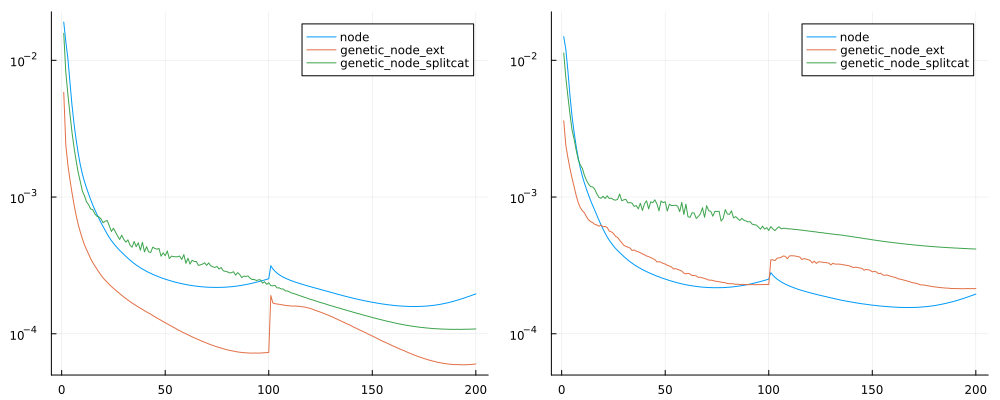

In [7]:
using DelimitedFiles, Plots

plot1 = plot(readdlm("_pi2_2_64/node_train200.csv", ','), label="node", yscale = :log10)
plot!(readdlm("_pi2_2_64/genetic_node_ext_train200.csv", ','), label="genetic_node_ext", yscale = :log10)
plot!(readdlm("_pi2_2_64/genetic_node_splitcat_train200.csv", ','), label="genetic_node_splitcat", yscale = :log10)
#hline!([gsr_train_loss], label="genetic_symreg", linestyle=:dash)

plot2 = plot(readdlm("_pi2_2_64/node_valid200.csv", ','), label="node", yscale = :log10)
plot!(readdlm("_pi2_2_64/genetic_node_ext_valid200.csv", ','), label="genetic_node_ext", yscale = :log10)
plot!(readdlm("_pi2_2_64/genetic_node_splitcat_valid200.csv", ','), label="genetic_node_splitcat", yscale = :log10)
#hline!([gsr_valid_loss], label="genetic_symreg", linestyle=:dash)

plot(plot1, plot2, layout = grid(1, 2), size=(1000,400), link = :y)

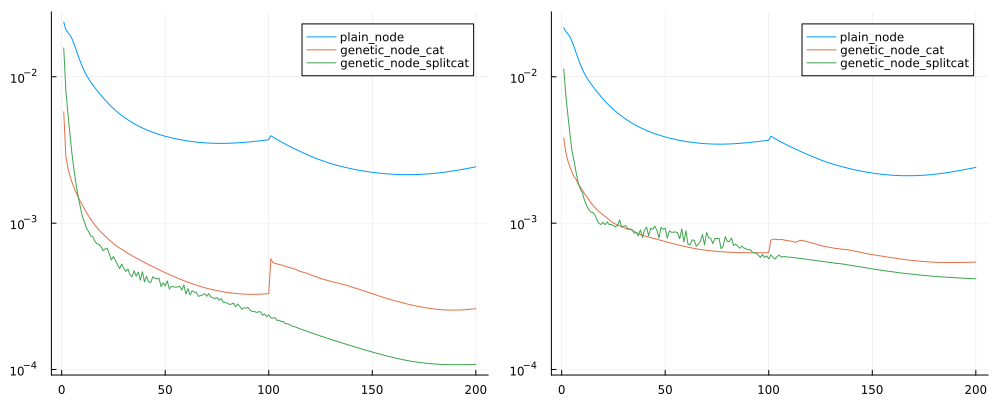

In [8]:
using DelimitedFiles, Plots

plot1 = plot(readdlm("_pi2_2_64/plain_node_train200.csv", ','), label="plain_node", yscale = :log10)
plot!(readdlm("_pi2_2_64/genetic_node_cat_train200.csv", ','), label="genetic_node_cat", yscale = :log10)
plot!(readdlm("_pi2_2_64/genetic_node_splitcat_train200.csv", ','), label="genetic_node_splitcat", yscale = :log10)
#hline!([gsr_train_loss], label="genetic_symreg", linestyle=:dash)

plot2 = plot(readdlm("_pi2_2_64/plain_node_valid200.csv", ','), label="plain_node", yscale = :log10)
plot!(readdlm("_pi2_2_64/genetic_node_cat_valid200.csv", ','), label="genetic_node_cat", yscale = :log10)
plot!(readdlm("_pi2_2_64/genetic_node_splitcat_valid200.csv", ','), label="genetic_node_splitcat", yscale = :log10)
#hline!([gsr_valid_loss], label="genetic_symreg", linestyle=:dash)

plot(plot1, plot2, layout = grid(1, 2), size=(1000,400), link = :y)

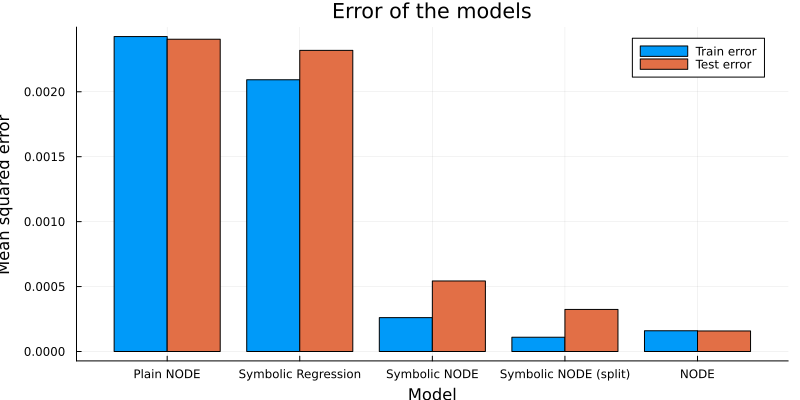

In [101]:
using DelimitedFiles, Plots, StatsPlots

train_errors = []
valid_errors = []

push!(train_errors, readdlm("_pi2_2_64/plain_node_train200.csv", ',')[end])
push!(valid_errors, readdlm("_pi2_2_64/plain_node_valid200.csv", ',')[end])

push!(train_errors, gsr_train_loss)
push!(valid_errors, gsr_valid_loss)

push!(train_errors, readdlm("_pi2_2_64/genetic_node_cat_train200.csv", ',')[end])
push!(valid_errors, readdlm("_pi2_2_64/genetic_node_cat_valid200.csv", ',')[end])

push!(train_errors, readdlm("_pi2_2_64/genetic_node_splitcat_train200.csv", ',')[end])
push!(valid_errors, readdlm("_pi2_2_64/genetic_node_splitcat_valid200.csv", ',')[end])

push!(train_errors, readdlm("pi2_2_64/node_train200.csv", ',')[end])
push!(valid_errors, readdlm("pi2_2_64/node_valid200.csv", ',')[end])

groupedbar([train_errors valid_errors], 
    xticks = (1:5, ["Plain NODE" "Symbolic Regression" "Symbolic NODE" "Symbolic NODE (split)" "NODE"]),
    ylabel = "Mean squared error",
    xlabel = "Model",
    title = "Error of the models",
    labels = ["Train error" "Test error"],
    #yscale = :log10,
    legend = :topright, 
    size = (800, 400))

#Save the plot
#savefig("_pi2_2_64/comparison.png")

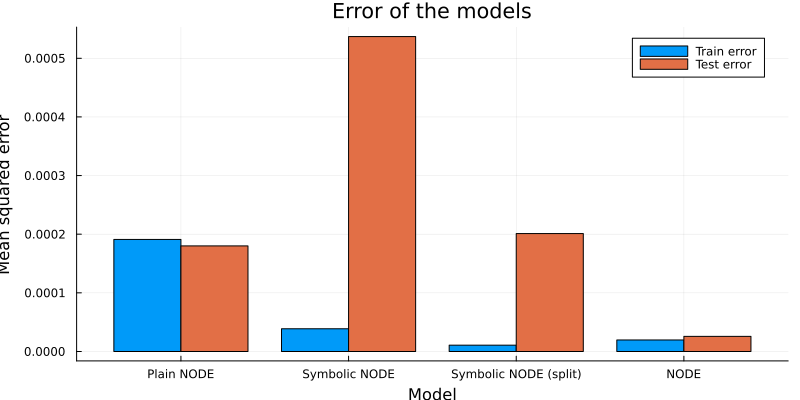

In [102]:
using DelimitedFiles, Plots, StatsPlots

train_errors = []
valid_errors = []

push!(train_errors, readdlm("_pi2_3_64/plain_node_train200.csv", ',')[end])
push!(valid_errors, readdlm("_pi2_3_64/plain_node_valid200.csv", ',')[end])

#push!(train_errors, gsr_train_loss)
#push!(valid_errors, gsr_valid_loss)

push!(train_errors, readdlm("_pi2_3_64/genetic_node_cat_train200.csv", ',')[end])
push!(valid_errors, readdlm("_pi2_3_64/genetic_node_cat_valid200.csv", ',')[end])

push!(train_errors, readdlm("_pi2_3_64/genetic_node_splitcat_train200.csv", ',')[end])
push!(valid_errors, readdlm("_pi2_3_64/genetic_node_splitcat_valid200.csv", ',')[end])

push!(train_errors, readdlm("pi2_3_64/node_train200.csv", ',')[end])
push!(valid_errors, readdlm("pi2_3_64/node_valid200.csv", ',')[end])

groupedbar([train_errors valid_errors], 
    xticks = (1:4, ["Plain NODE" "Symbolic NODE" "Symbolic NODE (split)" "NODE"]),
    ylabel = "Mean squared error",
    xlabel = "Model",
    title = "Error of the models",
    labels = ["Train error" "Test error"],
    #yscale = :log10,
    legend = :topright, 
    size = (800, 400))

#Save the plot
#savefig("_pi2_3_64/comparison.png")

## $\pi/2$; small network

Parameters:
- Initial condition: $x_0 = [\pi/2, \pi/2, 0, 0]$
- N_t = 8000
- dt = 0.02
- 1 hidden layer with 64 units and tanh activation
- weight decay: 1e-6
- learning rate schedule: cosine annealing 1e-3 -> 1e-4


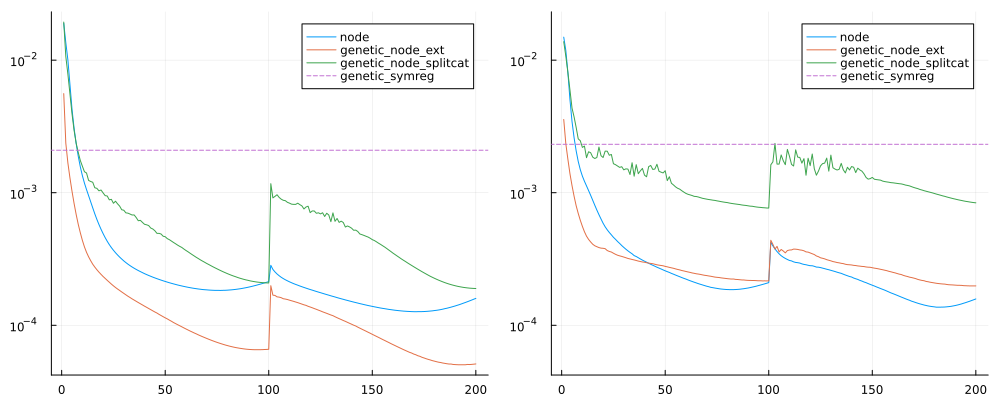

In [16]:
using DelimitedFiles, Plots

plot1 = plot(readdlm("pi2_2_64/node_train200.csv", ','), label="node", yscale = :log10)
plot!(readdlm("pi2_2_64/genetic_node_ext_train200.csv", ','), label="genetic_node_ext", yscale = :log10)
plot!(readdlm("pi2_2_64/genetic_node_splitcat_train200.csv", ','), label="genetic_node_splitcat", yscale = :log10)
hline!([gsr_train_loss], label="genetic_symreg", linestyle=:dash)

plot2 = plot(readdlm("pi2_2_64/node_valid200.csv", ','), label="node", yscale = :log10)
plot!(readdlm("pi2_2_64/genetic_node_ext_valid200.csv", ','), label="genetic_node_ext", yscale = :log10)
plot!(readdlm("pi2_2_64/genetic_node_splitcat_valid200.csv", ','), label="genetic_node_splitcat", yscale = :log10)
hline!([gsr_valid_loss], label="genetic_symreg", linestyle=:dash)

plot(plot1, plot2, layout = grid(1, 2), size=(1000,400), link = :y)

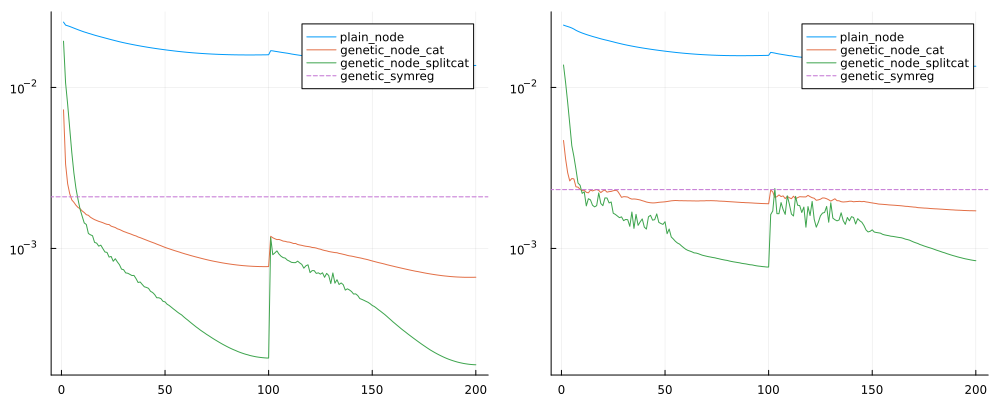

In [56]:
using DelimitedFiles, Plots

plot1 = plot(readdlm("pi2_2_64/plain_node_train200.csv", ','), label="plain_node", yscale = :log10)
plot!(readdlm("pi2_2_64/genetic_node_cat_train200.csv", ','), label="genetic_node_cat", yscale = :log10)
plot!(readdlm("pi2_2_64/genetic_node_splitcat_train200.csv", ','), label="genetic_node_splitcat", yscale = :log10)
hline!([gsr_train_loss], label="genetic_symreg", linestyle=:dash)

plot2 = plot(readdlm("pi2_2_64/plain_node_valid200.csv", ','), label="plain_node", yscale = :log10)
plot!(readdlm("pi2_2_64/genetic_node_cat_valid200.csv", ','), label="genetic_node_cat", yscale = :log10)
plot!(readdlm("pi2_2_64/genetic_node_splitcat_valid200.csv", ','), label="genetic_node_splitcat", yscale = :log10)
hline!([gsr_valid_loss], label="genetic_symreg", linestyle=:dash)

plot(plot1, plot2, layout = grid(1, 2), size=(1000,400), link = :y)

## $\pi/2$; wide network

Parameters:
- Initial condition: $x_0 = [\pi/2, \pi/2, 0, 0]$
- N_t = 8000
- dt = 0.02
- 1 hidden layer with 128 units and tanh activation
- weight decay: 1e-6
- learning rate schedule: cosine annealing 1e-3 -> 1e-4


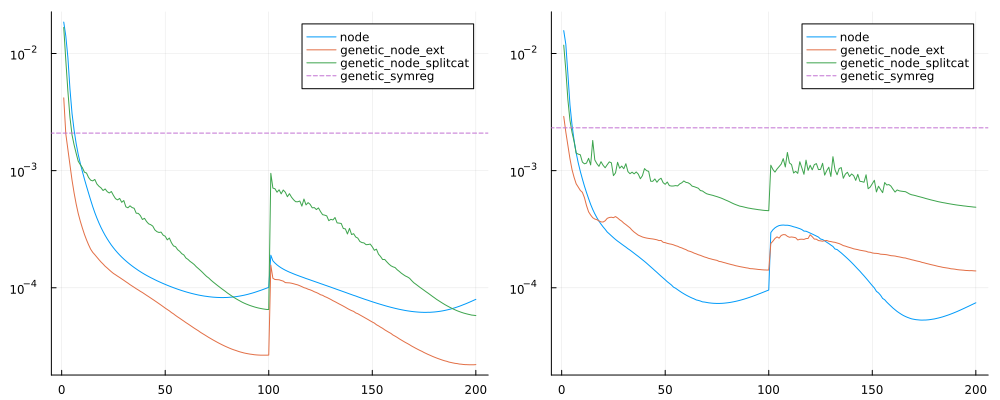

In [18]:
plot1 = plot(readdlm("pi2_2_128/node_train200.csv", ','), label="node", yscale = :log10)
plot!(readdlm("pi2_2_128/genetic_node_ext_train200.csv", ','), label="genetic_node_ext", yscale = :log10)
plot!(readdlm("pi2_2_128/genetic_node_splitcat_train200.csv", ','), label="genetic_node_splitcat", yscale = :log10)
hline!([gsr_train_loss], label="genetic_symreg", linestyle=:dash)

plot2 = plot(readdlm("pi2_2_128/node_valid200.csv", ','), label="node", yscale = :log10)
plot!(readdlm("pi2_2_128/genetic_node_ext_valid200.csv", ','), label="genetic_node_ext", yscale = :log10)
plot!(readdlm("pi2_2_128/genetic_node_splitcat_valid200.csv", ','), label="genetic_node_splitcat", yscale = :log10)
hline!([gsr_valid_loss], label="genetic_symreg", linestyle=:dash)

plot(plot1, plot2, layout = grid(1, 2), size=(1000,400), link = :y)

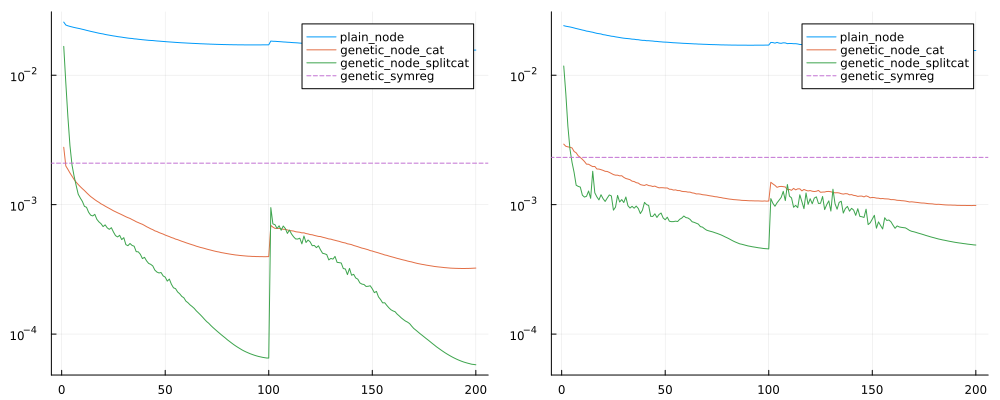

In [57]:
plot1 = plot(readdlm("pi2_2_128/plain_node_train200.csv", ','), label="plain_node", yscale = :log10)
plot!(readdlm("pi2_2_128/genetic_node_cat_train200.csv", ','), label="genetic_node_cat", yscale = :log10)
plot!(readdlm("pi2_2_128/genetic_node_splitcat_train200.csv", ','), label="genetic_node_splitcat", yscale = :log10)
hline!([gsr_train_loss], label="genetic_symreg", linestyle=:dash)

plot2 = plot(readdlm("pi2_2_128/plain_node_valid200.csv", ','), label="plain_node", yscale = :log10)
plot!(readdlm("pi2_2_128/genetic_node_cat_valid200.csv", ','), label="genetic_node_cat", yscale = :log10)
plot!(readdlm("pi2_2_128/genetic_node_splitcat_valid200.csv", ','), label="genetic_node_splitcat", yscale = :log10)
hline!([gsr_valid_loss], label="genetic_symreg", linestyle=:dash)

plot(plot1, plot2, layout = grid(1, 2), size=(1000,400), link = :y)

## $\pi/2$; deep network

Parameters:
- Initial condition: $x_0 = [\pi/2, \pi/2, 0, 0]$
- N_t = 8000
- dt = 0.02
- 2 hidden layers with 64 units and tanh activation
- weight decay: 1e-6
- learning rate schedule: cosine annealing 1e-3 -> 1e-4


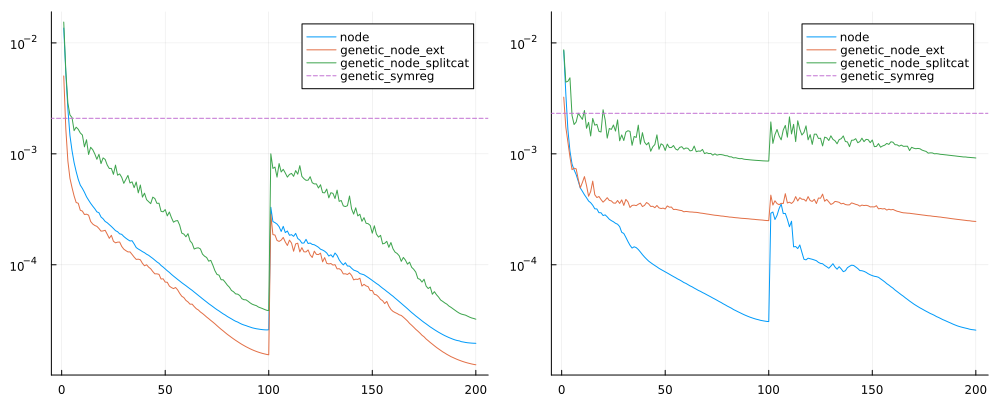

In [20]:
using DelimitedFiles, Plots

plot1 = plot(readdlm("pi2_3_64/node_train200.csv", ','), label="node", yscale = :log10)
plot!(readdlm("pi2_3_64/genetic_node_ext_train200.csv", ','), label="genetic_node_ext", yscale = :log10)
plot!(readdlm("pi2_3_64/genetic_node_splitcat_train200.csv", ','), label="genetic_node_splitcat", yscale = :log10)
hline!([gsr_train_loss], label="genetic_symreg", linestyle=:dash)

plot2 = plot(readdlm("pi2_3_64/node_valid200.csv", ','), label="node", yscale = :log10)
plot!(readdlm("pi2_3_64/genetic_node_ext_valid200.csv", ','), label="genetic_node_ext", yscale = :log10)
plot!(readdlm("pi2_3_64/genetic_node_splitcat_valid200.csv", ','), label="genetic_node_splitcat", yscale = :log10)
hline!([gsr_valid_loss], label="genetic_symreg", linestyle=:dash)

plot(plot1, plot2, layout = grid(1, 2), size=(1000,400), link = :y)

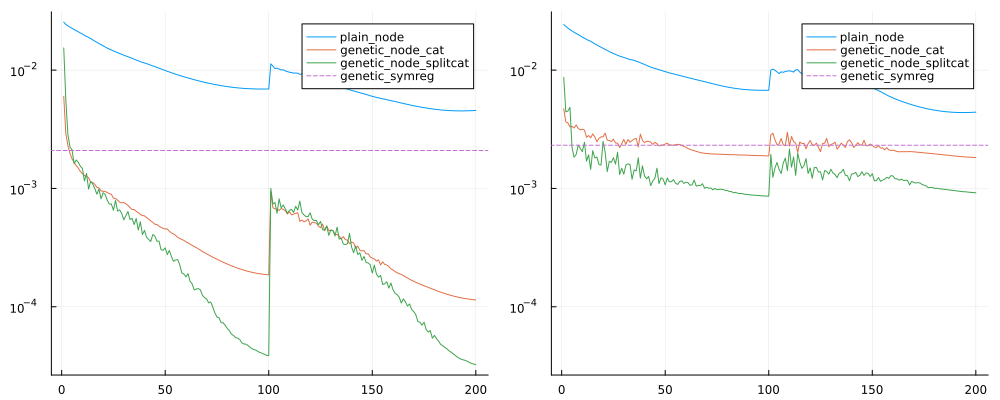

In [21]:
using DelimitedFiles, Plots

plot1 = plot(readdlm("pi2_3_64/plain_node_train200.csv", ','), label="plain_node", yscale = :log10)
plot!(readdlm("pi2_3_64/genetic_node_cat_train200.csv", ','), label="genetic_node_cat", yscale = :log10)
plot!(readdlm("pi2_3_64/genetic_node_splitcat_train200.csv", ','), label="genetic_node_splitcat", yscale = :log10)
hline!([gsr_train_loss], label="genetic_symreg", linestyle=:dash)

plot2 = plot(readdlm("pi2_3_64/plain_node_valid200.csv", ','), label="plain_node", yscale = :log10)
plot!(readdlm("pi2_3_64/genetic_node_cat_valid200.csv", ','), label="genetic_node_cat", yscale = :log10)
plot!(readdlm("pi2_3_64/genetic_node_splitcat_valid200.csv", ','), label="genetic_node_splitcat", yscale = :log10)
hline!([gsr_valid_loss], label="genetic_symreg", linestyle=:dash)

plot(plot1, plot2, layout = grid(1, 2), size=(1000,400), link = :y)

# Test NODE

In [90]:
p, re_nn = load_ANN("pi2_3_64/node200.bson")
function node(du, u, p, t)
    θ₁, θ₂, ω₁, ω₂ = u
    x = [ω₁, ω₂, sin(θ₁), cos(θ₁), sin(θ₂), cos(θ₂)]

    du[1] = ω₁
    du[2] = ω₂
    du[3:4] .= re_nn(p)(x)

    return nothing
end

import SciMLSensitivity: BacksolveAdjoint, ReverseDiffVJP
node_prob = ODEProblem{true}(node, x0, (Float32(0.),Float32(dt)), p)

model = NODE(node_prob, sensealg=BacksolveAdjoint(;autojacvec = ReverseDiffVJP(true),))

NODE{Vector{Float32}, ODEProblem{Vector{Float32}, Tuple{Float32, Float32}, true, Vector{Float32}, ODEFunction{true, SciMLBase.AutoSpecialize, typeof(node), LinearAlgebra.UniformScaling{Bool}, Nothing, Nothing, Nothing, Nothing, Nothing, Nothing, Nothing, Nothing, Nothing, Nothing, Nothing, Nothing, Nothing, typeof(SciMLBase.DEFAULT_OBSERVED), Nothing, Nothing}, Base.Pairs{Symbol, Union{}, Tuple{}, NamedTuple{(), Tuple{}}}, SciMLBase.StandardODEProblem}, Tsit5{typeof(OrdinaryDiffEq.trivial_limiter!), typeof(OrdinaryDiffEq.trivial_limiter!), Static.False}, NeuralODE.var"#3#5", Base.Pairs{Symbol, BacksolveAdjoint{0, true, Val{:central}, ReverseDiffVJP{true}}, Tuple{Symbol}, NamedTuple{(:sensealg,), Tuple{BacksolveAdjoint{0, true, Val{:central}, ReverseDiffVJP{true}}}}}}(Float32[0.20586386, 0.25196898, -0.020040432, -0.20234802, -0.14976363, -0.0004716357, -0.0022861455, 0.3916119, 0.22189115, 0.23419933  …  -0.57152194, 0.98493284, 1.4843875, 2.6681614, 2.3142507, -1.2477292, 0.98143107, 

In [91]:
#Test model
t = convert(Array{Float32,1}, collect(0:0.04:30))
rec_sol = model((t,x0))

4×751 Matrix{Float32}:
 1.5708   1.56292      1.53914    …    2.02088    2.00654     1.97494
 1.5708   1.57066      1.57025       -18.7581   -18.7151    -18.6782
 0.0     -0.395266    -0.793171       -0.14104   -0.574549   -1.00513
 0.0     -0.00629242  -0.0155017       1.15763    0.994405    0.855109

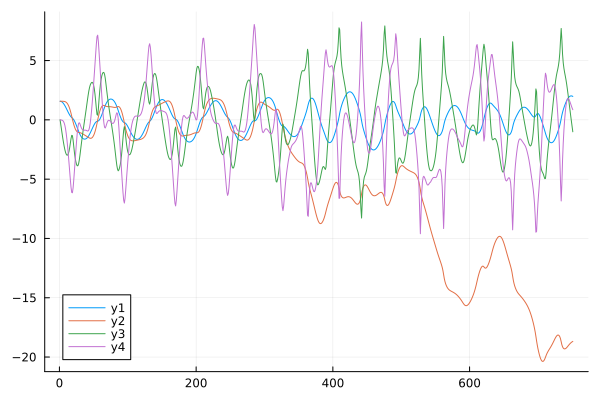

In [93]:
plot(transpose(rec_sol))

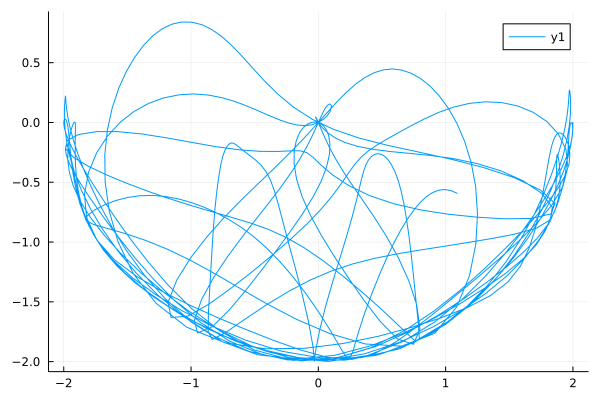

In [94]:
plot_trajectory(pendulum, rec_sol)

[ Info: Saved animation to c:\Users\Simon\Documents\PIK\Code\SymbolicNODE.jl\test\pendulum.gif


Plots.AnimatedGif("c:\\Users\\Simon\\Documents\\PIK\\Code\\SymbolicNODE.jl\\test\\pendulum.gif")
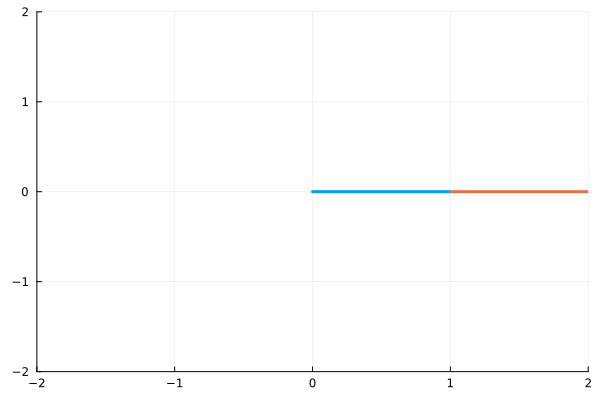

In [69]:
create_animation(pendulum, rec_sol)

# Test SymbolicNODE

In [76]:
gsr = load_gsr("genetic_pi_2.ser")
x_aug = SymbolicAugment(gsr,[3,4];min_size=1, max_size=2)
p, re_nn = load_ANN("_pi2_2_64/genetic_node_splitcat200.bson")

function node(du, u, p, t)
    θ₁, θ₂, ω₁, ω₂ = u

    du[1] = ω₁
    du[2] = ω₂
    du[3:4] .= re_nn(p)(vcat(x_aug(u),u))

    return nothing
end

node_prob = ODEProblem{true}(node, x0, (Float32(0.),Float32(dt)), p)

model = NODE(node_prob)

NODE{Vector{Float32}, ODEProblem{Vector{Float32}, Tuple{Float32, Float32}, true, Vector{Float32}, ODEFunction{true, SciMLBase.AutoSpecialize, typeof(node), LinearAlgebra.UniformScaling{Bool}, Nothing, Nothing, Nothing, Nothing, Nothing, Nothing, Nothing, Nothing, Nothing, Nothing, Nothing, Nothing, Nothing, typeof(SciMLBase.DEFAULT_OBSERVED), Nothing, Nothing}, Base.Pairs{Symbol, Union{}, Tuple{}, NamedTuple{(), Tuple{}}}, SciMLBase.StandardODEProblem}, Tsit5{typeof(OrdinaryDiffEq.trivial_limiter!), typeof(OrdinaryDiffEq.trivial_limiter!), Static.False}, NeuralODE.var"#2#4", Base.Pairs{Symbol, Union{}, Tuple{}, NamedTuple{(), Tuple{}}}}(Float32[-1.5261179, -0.6755575, 0.65460414, -0.52137685, 1.2221103, -2.8947396, -1.4398887, 0.81409395, 0.55017483, -1.4370688  …  -3.3124995, -0.20893915, -0.122754365, 2.5312464, 1.1207914, -2.9887316, -5.2357807, 5.2567554, 0.056133416, 0.45321268], ODEProblem{Vector{Float32}, Tuple{Float32, Float32}, true, Vector{Float32}, ODEFunction{true, SciMLBas

In [77]:
#Test model
t = convert(Array{Float32,1}, collect(0:0.04:30))
#sol = model((t,[1.6f0, 1.6f0, 0f0, 0f0]))
sol = model((t,x0))

4×751 Matrix{Float32}:
 1.5708   1.56285     1.53879    …  17.4129     17.6772     18.0118
 1.5708   1.57119     1.5724         0.282989   -0.154956   -0.67468
 0.0     -0.398581   -0.805738       5.82021     7.46671     9.1475
 0.0      0.0202664   0.0389812     -9.98911   -11.9732    -13.8608

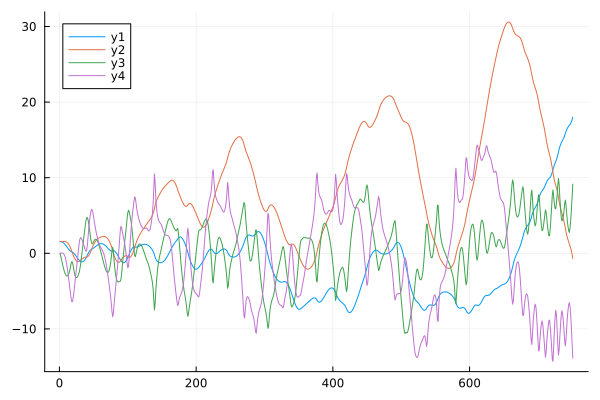

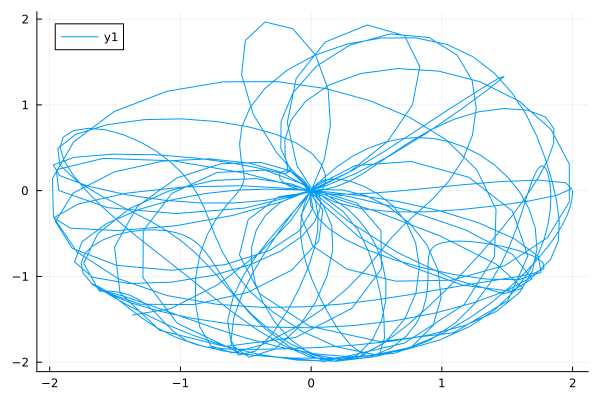

In [78]:
display(plot(transpose(sol)))
plot_trajectory(pendulum, sol)

[ Info: Saved animation to c:\Users\Simon\Documents\PIK\Code\SymbolicNODE.jl\test\pendulum.gif


Plots.AnimatedGif("c:\\Users\\Simon\\Documents\\PIK\\Code\\SymbolicNODE.jl\\test\\pendulum.gif")
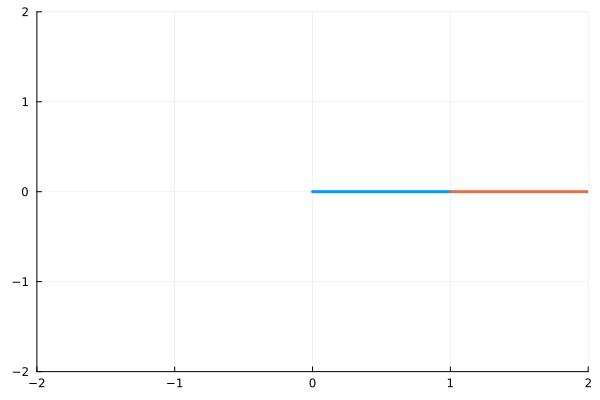

In [79]:
create_animation(pendulum, sol)